<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Quantum_computing4/blob/main/AnaAlonso_QC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance --upgrade --no-cache-dir

Github: yfinance

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
import seaborn as sns
import csv
import yfinance as yf

warnings.filterwarnings("ignore")
plt.style.use('seaborn')

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
!pip install pytickersymbols

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 21.8 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.42.0
    Uninstalling wheel-0.42.0:
      Successfully uninstalled wheel-0.42.0
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


Nos vamos a fjar en el valor de cerrado (Close) para analizar las gráficas.

[*********************100%%**********************]  27 of 27 completed


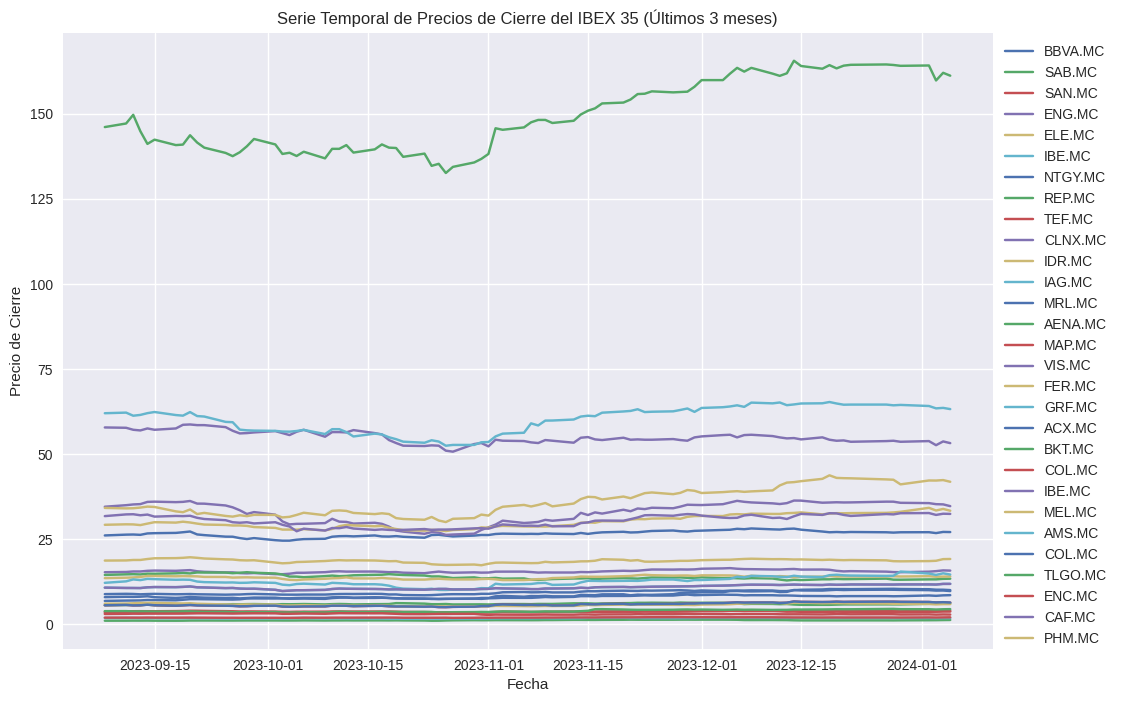

In [5]:
# Lista de símbolos de las acciones del IBEX35
ibex35_symbols = ['BBVA.MC', 'SAB.MC', 'SAN.MC', 'ENG.MC', 'ELE.MC', 'IBE.MC',
                  'NTGY.MC', 'REP.MC', 'TEF.MC', 'CLNX.MC', 'IDR.MC', 'IAG.MC',
                  'MRL.MC', 'AENA.MC', 'MAP.MC', 'VIS.MC', 'FER.MC', 'GRF.MC',
                  'ACX.MC', 'BKT.MC', 'COL.MC', 'IBE.MC', 'MEL.MC', 'AMS.MC',
                  'COL.MC', 'TLGO.MC', 'ENC.MC', 'CAF.MC', 'PHM.MC']

# Fecha de inicio y fin (últimos 3 meses)
end_date = datetime.today() - timedelta(days=30)
start_date = end_date - timedelta(days=120)

# Descargar datos desde Yahoo Finance
ibex35_data = yf.download(ibex35_symbols, start=start_date, end=end_date)['Adj Close']

# Graficar la serie temporal de los precios de cierre
plt.figure(figsize=(12, 8))
for symbol in ibex35_symbols:
    plt.plot(ibex35_data.index, ibex35_data[symbol], label=symbol)

plt.title('Serie Temporal de Precios de Cierre del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

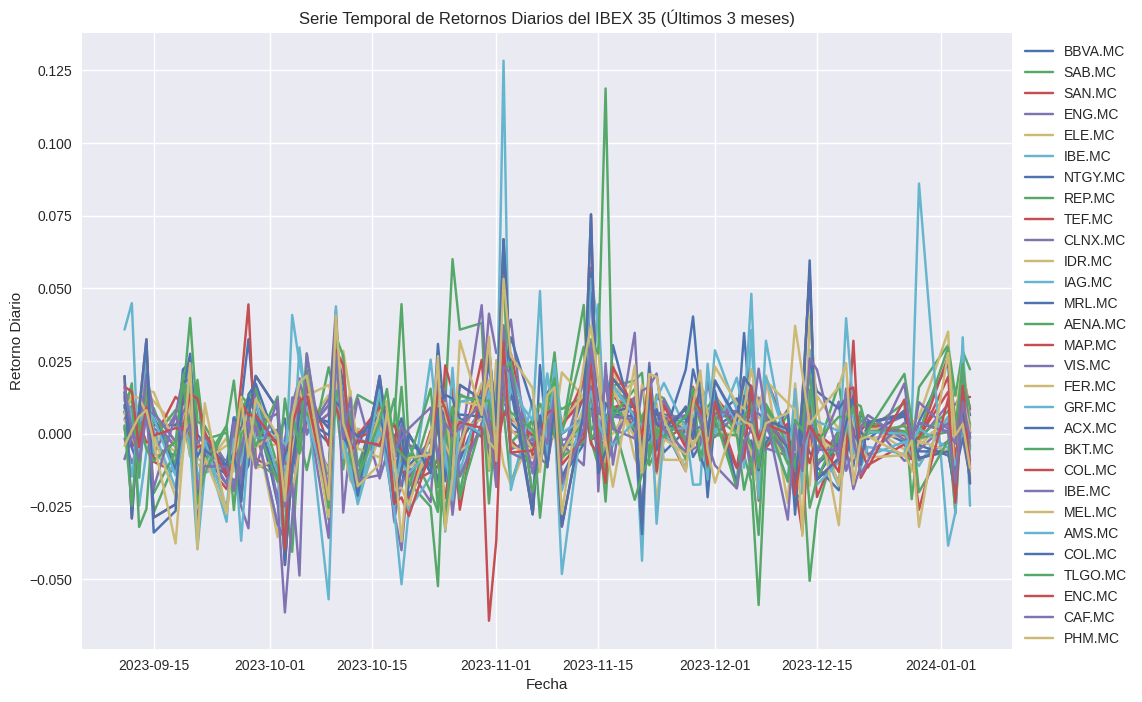

In [6]:
# Calcular los retornos diarios
returns = ibex35_data.pct_change()

# Graficar la serie temporal de los retornos
plt.figure(figsize=(12, 8))
for symbol in ibex35_symbols:
    plt.plot(returns.index, returns[symbol], label=symbol)

plt.title('Serie Temporal de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

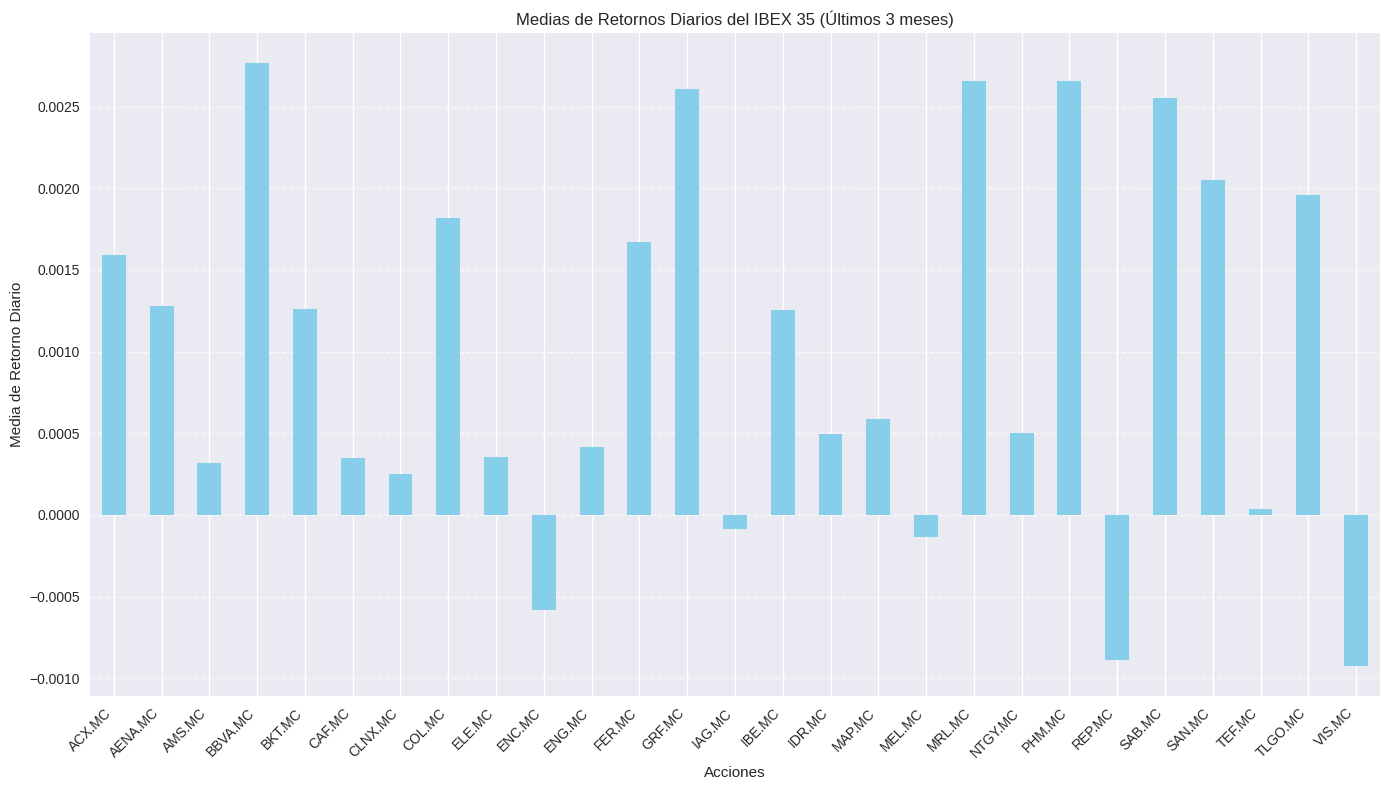

In [7]:
# Calcular la media de los retornos
mean_returns = returns.mean()

# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Vamos tanto la media como la varianza en el mismo gráfico de barras.

<Figure size 1400x800 with 0 Axes>

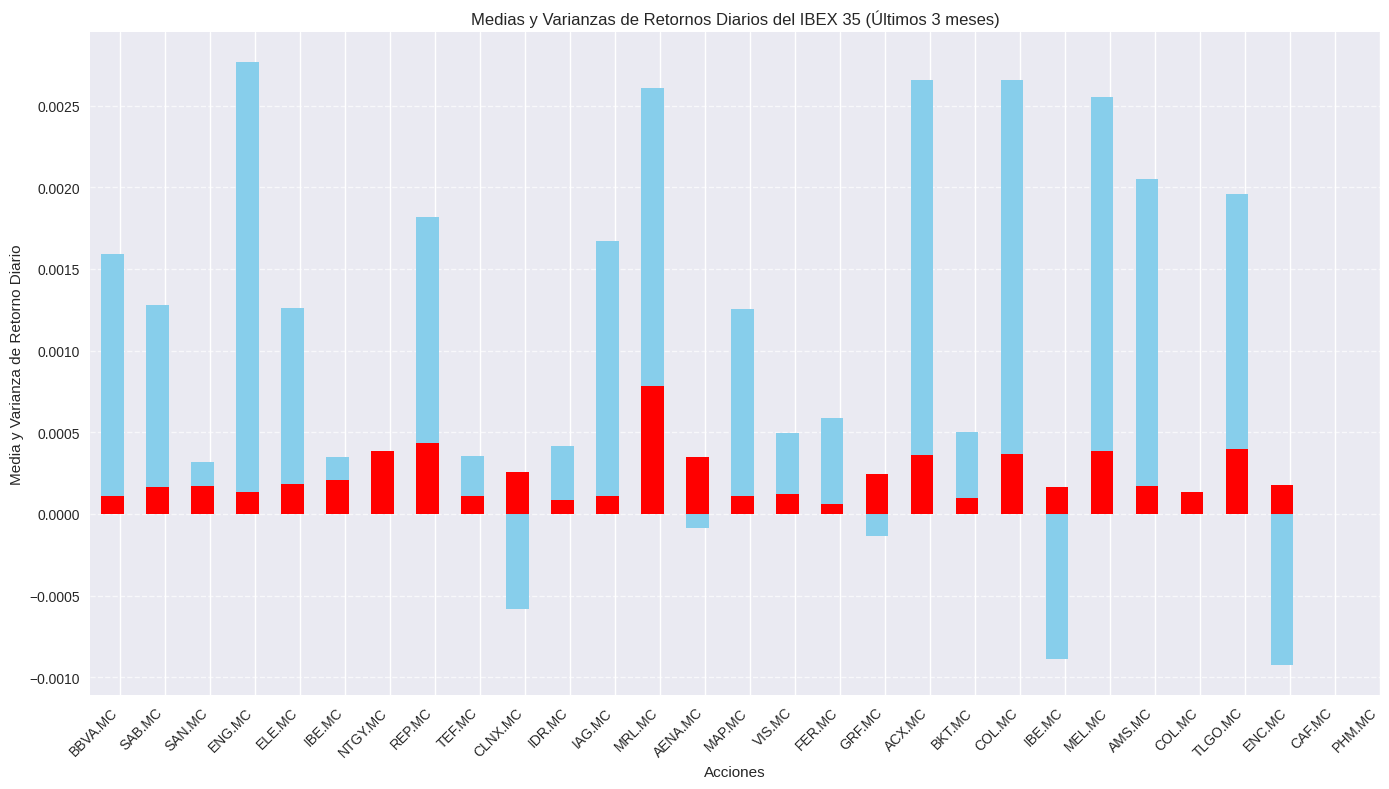

In [8]:
variance_returns = returns.var()

# Graficar el diagrama de barras de las medias y varianzas de los retornos
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(ibex35_symbols))

# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

variance_returns.plot(kind='bar', color='red')
plt.title('Medias y Varianzas de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media y Varianza de Retorno Diario')
plt.xticks(index + bar_width / 2, ibex35_symbols, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nos interesan aquellas acciones con una media alta y con poda varianza.

A continuación, vemos la misma gráfica pero la varianza en línea.

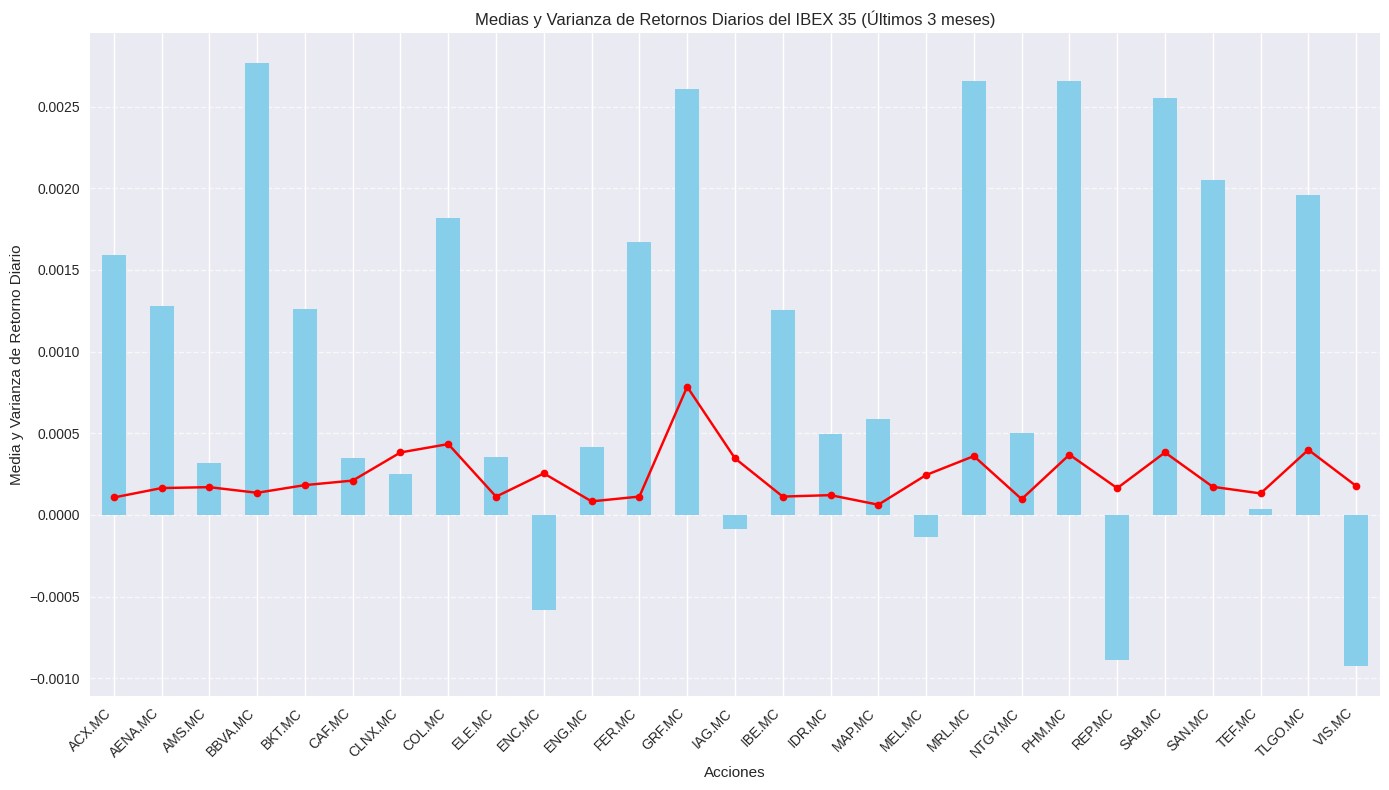

In [9]:
# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias y Varianza de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media y Varianza de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.plot(variance_returns, color = 'red', marker = '.', markeredgewidth = 2)

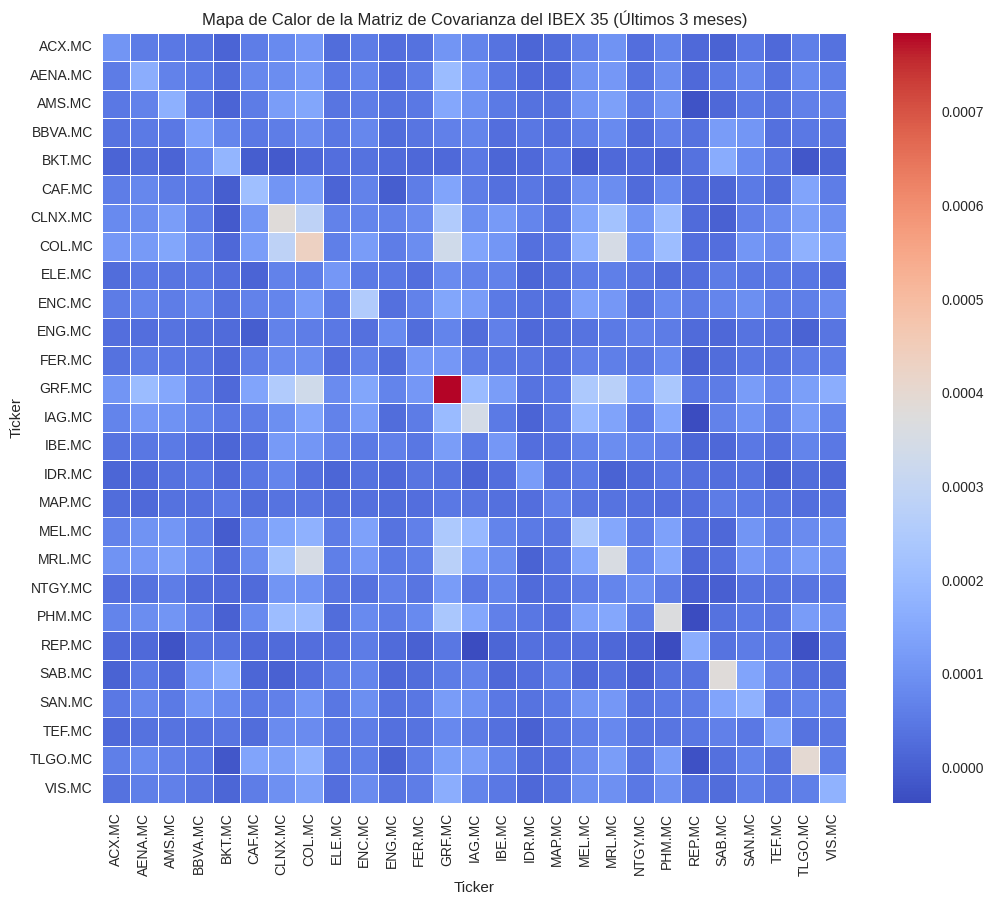

In [10]:
# Calcular la matriz de covarianza
covariance_matrix = returns.cov()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(covariance_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Covarianza del IBEX 35 (Últimos 3 meses)')
plt.show()

In [25]:
# Factor de inversión al riesgo: 0 < q < 1
q = 0.5

from itertools import combinations
vector = [0] * 27
combinations_list = list(combinations(range(27), 5))

for comb in combinations_list:
  new_vector = vector.copy()
  for index in comb:
    new_vector[index] = 1
    # print(new_vector)
  result_positions = []

  for index in comb:
    new_vector[index] = 1
  result_positions.append([i for i, x in enumerate(new_vector) if x == 1])
  print(result_positions)

  primer_sumatorio = 0
  segundo_sumatorio = 0
  for i in range(27):
    primer_sumatorio = primer_sumatorio + new_vector[i]*mean_returns[i]
    for j in range(27):
      segundo_sumatorio = segundo_sumatorio + new_vector[i]*covariance_matrix.iloc[i,j]*new_vector[j]
  function = primer_sumatorio - q*segundo_sumatorio
  print(new_vector)
  print(function)


Streaming output truncated to the last 5000 lines.
0.006148256618160471
[[5, 10, 18, 23, 26]]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
0.0034566624705134543
[[5, 10, 18, 24, 25]]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]
0.0042481619776255555
[[5, 10, 18, 24, 26]]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
0.0015421938902512688
[[5, 10, 18, 25, 26]]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]
0.0031793549389264736
[[5, 10, 19, 20, 21]]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
0.0023047552361927
[[5, 10, 19, 20, 22]]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
0.005579741256894307
[[5, 10, 19, 20, 23]]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
0.005067580078288062
[[5, 10, 19, 20, 24]]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0

KeyboardInterrupt: 